In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataset/teams.csv')
data.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [3]:
data

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [4]:
data.columns

Index(['team', 'country', 'year', 'events', 'athletes', 'age', 'height',
       'weight', 'medals', 'prev_medals', 'prev_3_medals'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [6]:
# Separate columns into numeric and categorical
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [7]:
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)


Numeric columns: Index(['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals',
       'prev_medals', 'prev_3_medals'],
      dtype='object')
Categorical columns: Index(['team', 'country'], dtype='object')


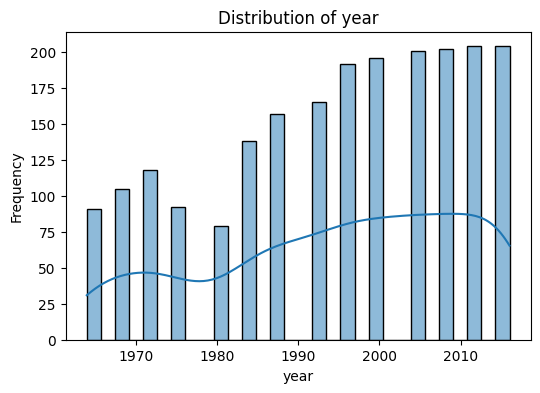

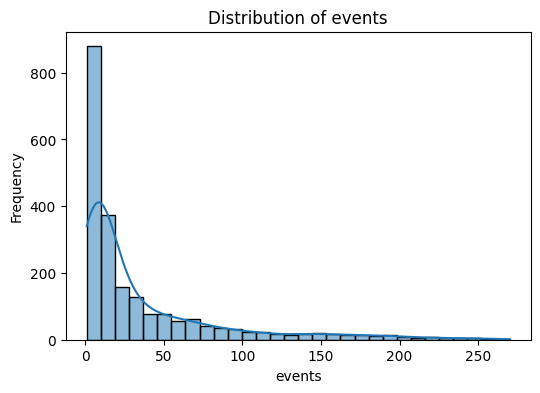

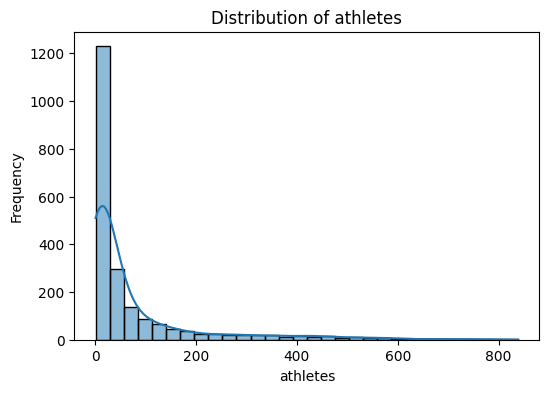

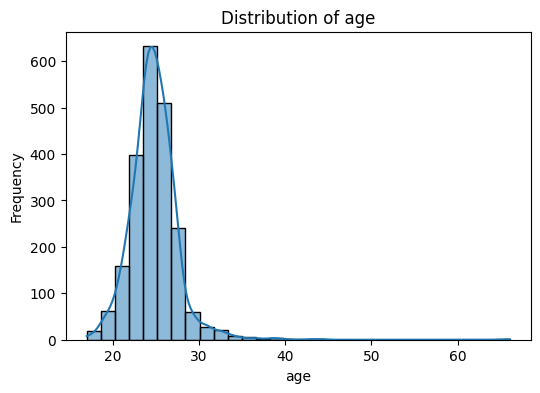

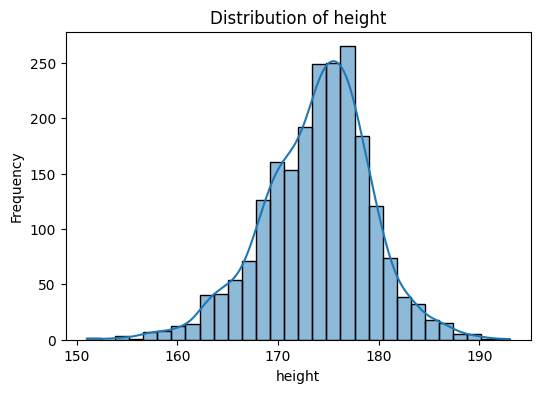

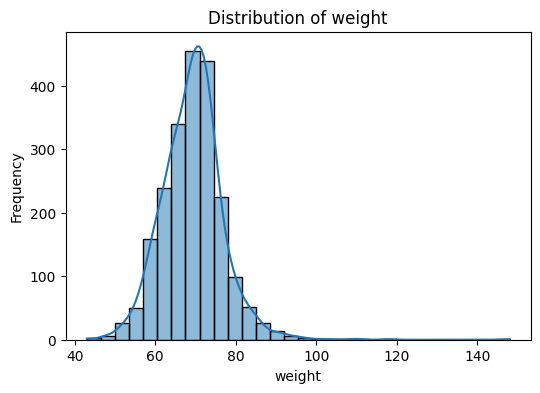

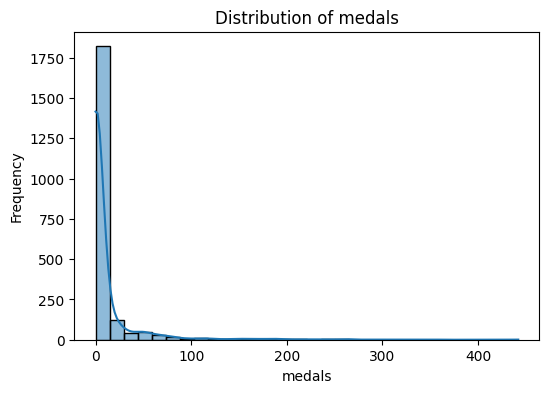

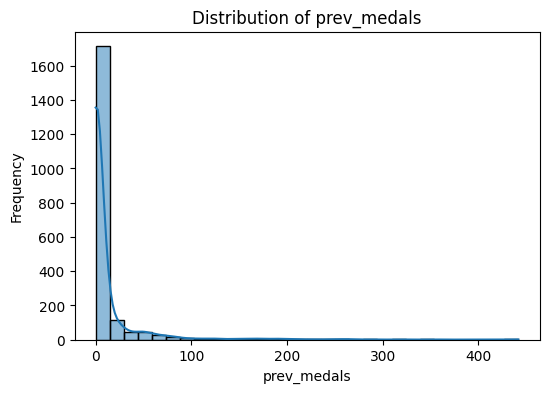

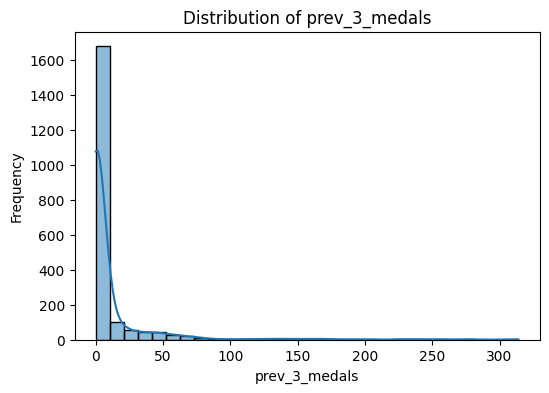

In [8]:
# Visualize distributions of numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [9]:
from sklearn.impute import SimpleImputer

# Impute missing values for numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])


In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])


In [11]:
print(data.isnull().sum())

team             0
country          0
year             0
events           0
athletes         0
age              0
height           0
weight           0
medals           0
prev_medals      0
prev_3_medals    0
dtype: int64


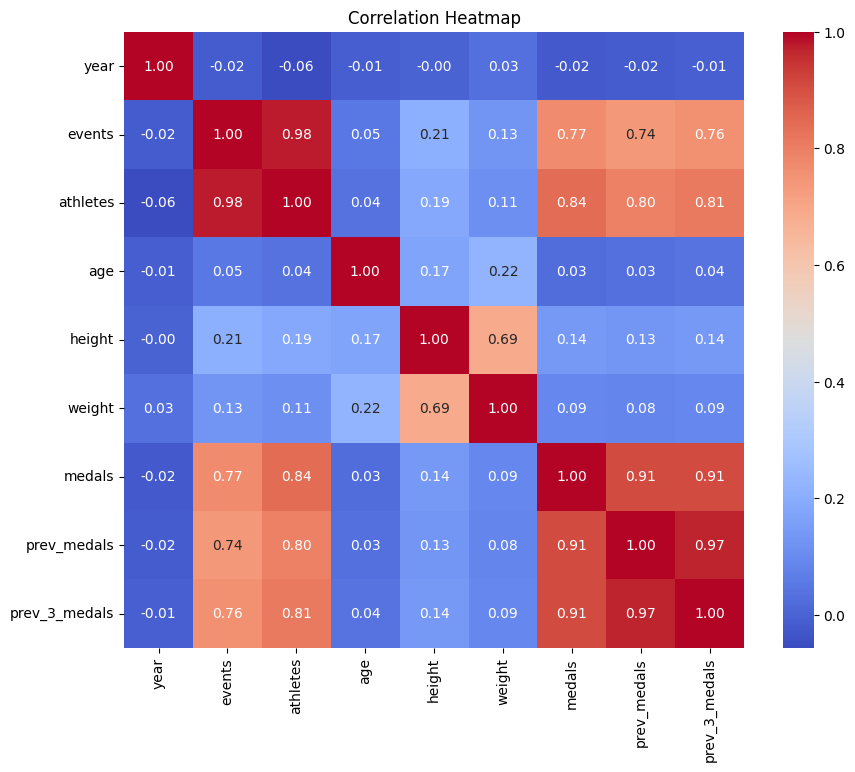

In [12]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
num_countries = data['country'].nunique()
print(f"Number of countries that participated in the Olympics: {num_countries}")


Number of countries that participated in the Olympics: 235


In [14]:
unique_countries = data['country'].unique()

print("Unique countries that participated in the Olympics:")
print(unique_countries)

Unique countries that participated in the Olympics:
['Afghanistan' 'Netherlands Antilles' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'American Samoa' 'Australia' 'Australia-2' 'Australia-1' 'Austria'
 'Azerbaijan' 'John B' 'Bahamas' 'Bangladesh' 'Barbados' 'Burundi'
 'Belgium' 'Benin' 'Oleander XII' 'Bermuda' 'Bhutan'
 'Bosnia and Herzegovina' 'Belize' 'Belarus' 'Bolivia' 'Botswana' 'Brazil'
 'Bahrain' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Central African Republic'
 'Cambodia' 'Canada' 'Canada-2' 'Cayman Islands' 'Congo (Brazzaville)'
 'Chad' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon' 'Congo (Kinshasa)'
 'Cook Islands' 'Colombia' 'Comoros' 'Cape Verde' 'Costa Rica' 'Croatia'
 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark' 'Digby' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Eritrea' 'El Salvador' 'Spain'
 'Estonia' 'Ethiopia' 'Unified Team' 'Fiji' 'Finland' 'France'
 'West Germany' 'Federated States of Micronesia' 'Gabon' 'G

In [15]:
# Define features and target 
features = data[['athletes', 'prev_medals']]  
target = data['medals'] 


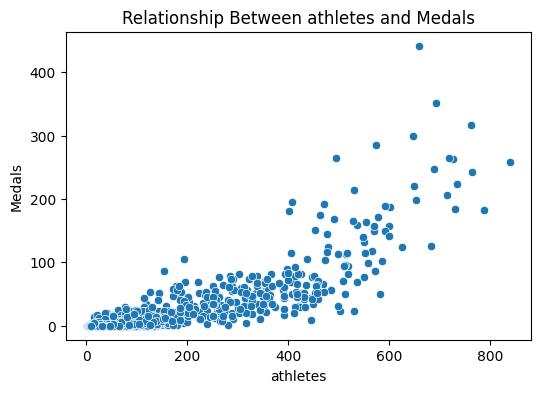

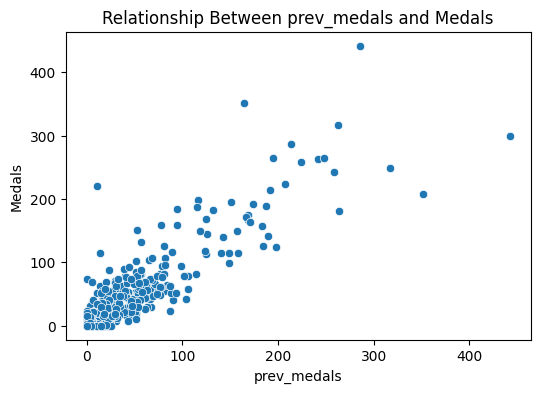

In [16]:
#Relationships between features and target
for feature in features.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=features[feature], y=target)
    plt.title(f"Relationship Between {feature} and Medals")
    plt.xlabel(feature)
    plt.ylabel("Medals")
    plt.show()


In [17]:
delete_row = data[data['prev_medals'] > 400]
print("Row to delete:")
print(delete_row)

data.drop(delete_row.index, inplace=True)

Row to delete:
     team       country    year  events  athletes   age  height  weight  \
2028  URS  Soviet Union  1988.0   221.0     647.0  24.1   177.1    73.7   

      medals  prev_medals  prev_3_medals  
2028   300.0        442.0          314.0  


In [18]:
delete_row = data[data['medals'] > 400]
print("Row to delete:")
print(delete_row)
data.drop(delete_row.index, inplace=True)

Row to delete:
     team       country    year  events  athletes   age  height  weight  \
2027  URS  Soviet Union  1980.0   202.0     660.0  23.7   176.5    72.6   

      medals  prev_medals  prev_3_medals  
2027   442.0        286.0          230.7  


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [20]:
features_train.shape

(1715, 2)

In [21]:
features_test.shape

(429, 2)

In [22]:
features_train


,athletes,prev_medals
1970,16.0,1.000000
163,26.0,0.000000
203,6.0,0.000000
840,7.0,0.000000
994,203.0,31.000000
...,...,...
1638,14.0,0.000000
1095,13.0,0.000000
1130,7.0,10.248759
1294,18.0,2.000000


In [23]:
features_test

,athletes,prev_medals
1344,4.0,0.0
1934,9.0,0.0
128,93.0,8.0
332,4.0,0.0
1163,9.0,0.0
...,...,...
544,2.0,0.0
1200,9.0,0.0
508,118.0,47.0
1332,5.0,0.0


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import pickle 


In [25]:
# Define the models that I use
models = {
    'linear_regression': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'gradient_boosting': GradientBoostingRegressor()
}


In [26]:
model_accuracies = {}

In [27]:
# Train and evaluate each model

for model_name, model in models.items():
    # Train the model
    model.fit(features_train, target_train)
    
    # Predict on the test data
    prediction = model.predict(features_test)
    
    # Evaluate the model
    accuracy = r2_score(target_test, prediction)
    print(f"Accuracy of {model_name} = {accuracy:.2f}")
    
    model_accuracies[model_name] = accuracy
    

Accuracy of linear_regression = 0.90
Accuracy of decision_tree = 0.85
Accuracy of random_forest = 0.91
Accuracy of gradient_boosting = 0.90


In [28]:
# Save the trained model to a .pkl file
for model_name, model in models.items():
    with open(f"{model_name}_model.pkl", 'wb') as file:
        pickle.dump(model, file)
        print(f"{model_name}_model.pkl")


linear_regression_model.pkl
decision_tree_model.pkl
random_forest_model.pkl
gradient_boosting_model.pkl


In [29]:
print("Model Accuracies in percentage:")
for name, accuracy in model_accuracies.items():
    print(f"{name}: {accuracy * 100:.2f}%")

Model Accuracies in percentage:
linear_regression: 89.75%
decision_tree: 84.63%
random_forest: 91.05%
gradient_boosting: 90.18%
